# COGS 108 - EDA Checkpoint

# Names

- Ben Liou
- Fanqi Lin
- Tasnia Jamal
- Kendrick Nguyen

<a id='research_question'></a>
# Research Question

*Is there a correlation between students' Big Five personality traits (i.e. openness, conscientiousness, extraversion, agreeableness, and neuroticism) and academic performance?*

# Setup

Import the following packages. To get all the packages run `pip install -r requirements.txt`

In [1]:
# Import pandas, numpy, patsy
import pandas as pd
import numpy as np
import patsy

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style='white', rc={'lines.linewidth': '0.3'})

# matplotlib imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# scikit-learn imports
from sklearn import linear_model

# statsmodels imports
import statsmodels.api as sm

from itertools import combinations

Create an indexing constant for all Big Five Personalities

In [2]:
BIG_FIVE = ['conscientiousness', 
            'agreeableness', 
            'extraversion', 
            'neuroticism', 
            'openness']

Create an alpha value constant for testing statistical significance

In [3]:
ALPHA = 0.05

Read the first cleaned dataset `engineering_dataset.csv` and assign it to the variable `engineering_df`

In [4]:
engineering_df = pd.read_csv('data/cleaned_data/engineering_dataset.csv')

engineering_df.head()

,gender,gpa,conscientiousness,agreeableness,extraversion,neuroticism,openness
0,f,2.9528,0.423115,0.572048,0.912608,0.622248,0.637759
1,m,2.6000,0.877085,0.416111,0.912608,0.745163,0.401935
2,m,2.4776,0.676451,0.322382,0.957638,0.455971,0.365911
3,m,3.2160,0.306371,0.486991,0.606071,0.667445,0.719646
4,f,2.5720,0.088893,0.154436,0.125584,0.591561,0.599900


Read the second cleaned dataset `medical_dataset.csv` and assign it to the variable `medical_df`

In [5]:
medical_df = pd.read_csv('data/cleaned_data/medical_dataset.csv')

medical_df.head()

,gender,gpa,conscientiousness,agreeableness,extraversion,neuroticism,openness
0,f,3.84,0.136808,0.153094,0.806189,0.980456,0.887622
1,f,2.90,0.452769,0.838762,0.035831,0.543974,0.057003
2,f,2.57,0.537459,0.452769,0.726384,0.472313,0.677524
3,f,2.58,0.333876,0.043974,0.324104,0.350163,0.068404
4,f,3.65,0.793160,0.941368,0.324104,0.543974,0.744300


# Data Cleaning

We broke down the data cleaning into two parts respectively for the `Engineering Graduate Salary Prediction` and `Correlation of Personality Traits & GPA for Jordanian Medical Students` datasets. The same process follows for both datasets where we:

1. Created a dataframe by exclusively selecting our labels of interest, `gender`, `gpa`, `conscientiousness`, `agreeableness`, `extraversion`, `neuroticism`, and `openness`
2. Removed entries that contains any null (`NaN`) values
3. Standardized the `gender` and `gpa` labels to `m/f` values and `0.0 - 4.0` scaling respectively
4. Mapped each Big Five personality labels to percentiles relative to the dataset sample

Check out the data cleaning note notebook here [DataCheckpointGroup_032-Wi23](DataCheckpointGroup_032-Wi23.ipynb).

# Data Analysis & Results (EDA)

## Part I: Independent EDA of Engineering Graduates Dataset, `engineering_df`

Get descriptive statistics for the quantitative variables using `describe()`. You will notice that the outputted quartiles is roughly distributed for the Big Five personality labels; this is the effect of mappinng the values into percentiles. 

In [6]:
engineering_df.describe()

,gpa,conscientiousness,agreeableness,extraversion,neuroticism,openness
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,2.860394,0.500167,0.500167,0.500167,0.500167,0.500167
std,0.324898,0.288650,0.288598,0.288632,0.288676,0.288584
min,0.265200,0.000334,0.000500,0.000500,0.001167,0.000334
25%,2.661200,0.250000,0.243996,0.259673,0.249333,0.243662
50%,2.872000,0.505337,0.486991,0.504336,0.504670,0.478819
75%,3.052000,0.750667,0.754169,0.754503,0.745163,0.752502
max,3.997200,0.998165,0.999166,0.998332,0.999833,0.995330


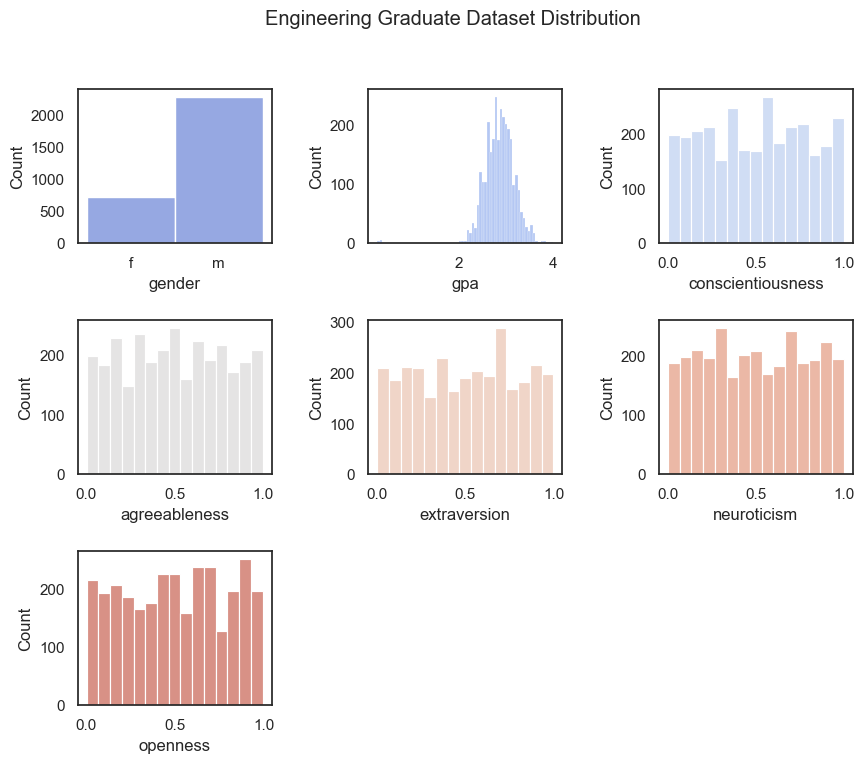

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Engineering Graduate Dataset Distribution')

palette = ['#c1d2f1', '#dddcdc', '#ecc7b6', '#e5a089', '#cc6c5e']
posistion = [axes[0][2], axes[1][0], axes[1][1], axes[1][2], axes[2][0]]

# Gender distribution
sns.histplot(data=engineering_df, x='gender', ax=axes[0][0], color='#738bd9')

# GPA distribution
sns.histplot(data=engineering_df, x='gpa', ax=axes[0][1], color='#9bb5f0')

# Big Five personalities distribution
for personality, axes_pos, color_plt in zip(BIG_FIVE, posistion, palette):
    sns.histplot(data=engineering_df, x=personality, ax=axes_pos, color=color_plt)

plt.show()

By examining a correlation matrix, we can pair column labels and observe their correlation coefficients. Looking at the correlations between `gpa`, there appears to be very weak correlations between any of the Big Five traits. 

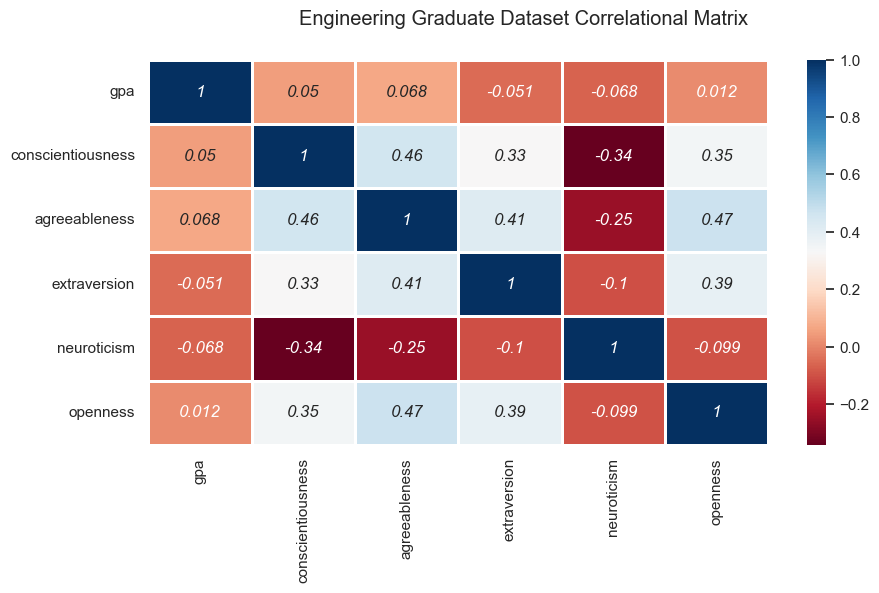

In [8]:
fig, axes = plt.subplots(figsize=(10, 5))
fig.suptitle('Engineering Graduate Dataset Correlational Matrix')

# Compute correlational matrix for quantitative labels
engineering_corr = engineering_df[['gpa']+BIG_FIVE]

engineering_corr = engineering_corr.corr()

# Plot correlational matrix
sns.heatmap(engineering_corr, cmap='RdBu', ax=axes, linewidths=1, annot=True, annot_kws={'fontstyle': 'italic'})

plt.show()

The respective correlation coefficients should reflect in the scatter plots against `gpa` below. The scatter plots does suggest a "zero" like relationship between `gpa` and each Big Five traits.

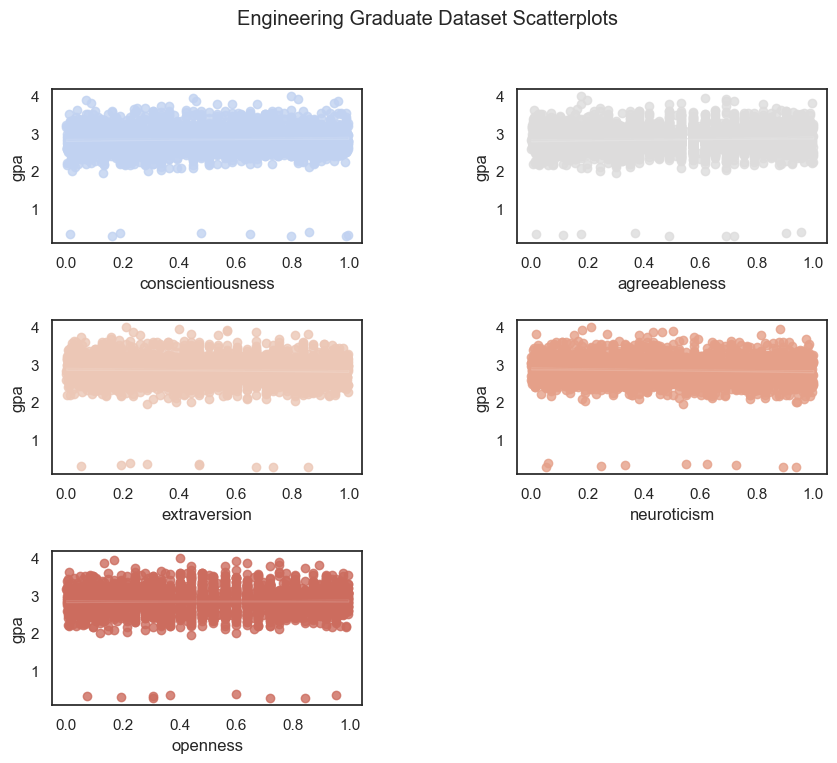

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
fig.delaxes(axes[2][1])
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Engineering Graduate Dataset Scatterplots')

palette = ['#c1d2f1', '#dddcdc', '#ecc7b6', '#e5a089', '#cc6c5e']
posistion = [axes[0][0], axes[0][1], axes[1][0], axes[1][1], axes[2][0]]

# Big Five personalities scatterplots
for personality, axes_pos, color_plt in zip(BIG_FIVE, posistion, palette):
    sns.regplot(data=engineering_df, y='gpa', x=personality, ax=axes_pos, color=color_plt)

plt.show()

Although there is evidence to claim there is no correlation from direct analysis, it would be rash to exlcude the possibility of confounding variables. For example, whether the correlation of `gpa` and `conscientiousnes` is potentially affected by `agreeableness` or `gender`. To check for confounding variables for each Big Five personalities, we will create regression models with multiple predictor variables to control for confounding variables. We will then compare their respective linear coefficients with the 10% Rule for Confounding.


| Single Correlations                 | Multi Correlations                                       |
| :---------------------------------- | --------------------------------------------------------:|
| `conscientiousness` vs. `gpa`       | (`conscientiousness` and `agreeableness`) vs. `gpa`      |
|                                     | (`conscientiousness` and `extraversion`) vs. `gpa`       |
|                                     | (`conscientiousness` and `neuroticism`) vs. `gpa`        |
|                                     | (`conscientiousness` and `openness`) vs. `gpa`           |
| `agreeableness` vs. `gpa`           | (`agreeableness` and `conscientiousness`) vs. `gpa`      |
|                                     | (`agreeableness` and `extraversion`) vs. `gpa`           |
|                                     | (`agreeableness` and `neuroticism`) vs. `gpa`            |
|                                     | (`agreeableness` and `openness`) vs. `gpa`               |
| `extraversion` vs. `gpa`            | (`extraversion` and `conscientiousness`) vs. `gpa`       |
|                                     | (`extraversion` and `agreeableness`) vs. `gpa`           |
|                                     | (`extraversion` and `nueroticism`) vs. `gpa`             |
|                                     | (`extraversion` and `openess`) vs. `gpa`                 |
| `neuroticism` vs. `gpa`             | (`neuroticism` and `conscientiousness`) vs. `gpa`        |
|                                     | (`neuroticism` and `agreeableness`) vs. `gpa`            |
|                                     | (`neuroticism` and `extraversion`) vs. `gpa`             |
|                                     | (`neuroticism` and `openness`) vs. `gpa`                 |
| `openness` vs. `gpa`                | (`openness` and `conscientiousness`) vs. `gpa`           |
|                                     | (`openness` and `agreeableness`) vs. `gpa`               |
|                                     | (`openness` and `extraversion`) vs. `gpa`                |
|                                     | (`openness` and `neuroticism`) vs. `gpa`                 |

In [10]:
# One-hot encode gender values: (m=1, f=0)
engineering_df['gender'] = engineering_df['gender'].replace(['m', 'f'], [1, 0])

In [11]:
# Initialize linear regression model
reg = linear_model.LinearRegression()

In [12]:
# Convert data into arrays for easier use with sklearn
d_gpa = np.reshape(engineering_df.gpa.values, [len(engineering_df.gpa), 1])
d_conscientiousness = np.reshape(engineering_df.conscientiousness.values, [len(engineering_df.conscientiousness), 1])
d_agreeableness = np.reshape(engineering_df.agreeableness.values, [len(engineering_df.agreeableness), 1])
d_extraversion = np.reshape(engineering_df.extraversion.values, [len(engineering_df.extraversion), 1])
d_neuroticism = np.reshape(engineering_df.neuroticism.values, [len(engineering_df.neuroticism), 1])
d_openness = np.reshape(engineering_df.openness.values, [len(engineering_df.openness), 1])
d_gender = np.reshape(engineering_df.gender.values, [len(engineering_df.gender), 1])

In [13]:
# Create multi-correlation predictors (accounts for repeats)
variables = [d_conscientiousness, d_agreeableness, d_extraversion, d_neuroticism, d_openness, d_gender]
multi_variables = list(combinations(variables, 2))

Fitting a model with a single predictor should yield similar linear coefficients as the correlational coefficients in the heatmap. The model will be in this from, where `d2` is observed as `gpa` and  `d1` is observed as each Big Five personality. Our label of interest is `a1` which is the linear coefficient.

$$ d2 = a_0 + a_1 * d1 $$

In [14]:
# Single predictor
single_predictor = {feature: None for feature in BIG_FIVE+['gender']}

for variable, key in zip(variables, single_predictor.keys()):
    reg.fit(variable, d_gpa)
    single_predictor[key] = reg.coef_[0][0]
    
single_predictor

{'conscientiousness': 0.056114706582955066,
 'agreeableness': 0.07659463445641819,
 'extraversion': -0.0576988846812707,
 'neuroticism': -0.07654076993118683,
 'openness': 0.013107233491955554,
 'gender': -0.12876334294625655}

Linear coefficients for multiple predictors. The model will be in this from, where `d5` is observed as `gpa` and `d3` and `d4` is observed as a Big Five personality pair. Our label of interest is `a4` and `a5` which is the linear coefficients.

$$ d5 = a_3 + a_4 * d3 + a_5 * d4 $$

Our goal is to check if $a_4$ is within a 10% error of $a_1$. If not, then the Big Five personality pair is confounded when correlating against `gpa`

In [15]:
# Mutltiple predictor
multi_predictor = {feature_pair: None for feature_pair in combinations(BIG_FIVE+['gender'], 2)}

for variable_pair, key in zip(multi_variables, multi_predictor.keys()):
    reg.fit(np.hstack(variable_pair), d_gpa)
    multi_predictor[key] = [reg.coef_[0][0], reg.coef_[0][1]]
    
multi_predictor

{('conscientiousness', 'agreeableness'): [0.026820550703294407,
  0.06438775701119195],
 ('conscientiousness', 'extraversion'): [0.08386163556508922,
  -0.0850587708218324],
 ('conscientiousness', 'neuroticism'): [0.033933046612514714,
  -0.06495495242565381],
 ('conscientiousness', 'openness'): [0.05857277494490162,
  -0.007120871084076264],
 ('conscientiousness', 'gender'): [0.04218267859779997, -0.12663705621274857],
 ('agreeableness', 'extraversion'): [0.12143632351301936, -0.1080731479219239],
 ('agreeableness', 'neuroticism'): [0.061252942297287984, -0.0611922430256611],
 ('agreeableness', 'openness'): [0.09069198274030635, -0.029799955604761855],
 ('agreeableness', 'gender'): [0.06062747099968681, -0.12522264152675835],
 ('extraversion', 'neuroticism'): [-0.06639150681022472, -0.08345403052816039],
 ('extraversion', 'openness'): [-0.07378572223754175, 0.04162954678082227],
 ('extraversion', 'gender'): [-0.05965329212059806, -0.12917681290869165],
 ('neuroticism', 'openness'): [-

We can prettify these numbers by categorizing them as a confounding variable or not using the 10% Rule for Confounding.

In [16]:
# Run 10% testing with expected coefficient from single variable prediction model
confounding_variables = {feature: [] for feature in BIG_FIVE+['gender']}

for feature in confounding_variables.keys():
    expected_coeff = single_predictor[feature]
    
    for feature_pair in multi_predictor.keys():
        if feature in feature_pair:
            coeff_index = feature_pair.index(feature)
            observed_coeff = multi_predictor[feature_pair]
            observed_coeff = observed_coeff[coeff_index]
            
            # Compute percentage difference, if >10% then it is a confounding variable
            difference = abs((expected_coeff - observed_coeff) / expected_coeff)
            confouding_variable = feature_pair[0 if coeff_index else 1]
            confounding_variables[feature] += [confouding_variable] if difference > 0.1 else []

In [17]:
for feature, confounding in confounding_variables.items():
    i = ', '.join(confounding) if confounding else 'none'
    print(f'{feature} confounds with: {i}')
    print('')

conscientiousness confounds with: agreeableness, extraversion, neuroticism, gender

agreeableness confounds with: conscientiousness, extraversion, neuroticism, openness, gender

extraversion confounds with: conscientiousness, agreeableness, neuroticism, openness

neuroticism confounds with: conscientiousness, agreeableness

openness confounds with: conscientiousness, agreeableness, extraversion, neuroticism, gender

gender confounds with: none



We observe that the relationship betweeen `gpa` and each Big Five traits is confounded with multiple personalities. These results would imply that a correlational analysis of `gpa` and any Big Five personality would require us controlling for confounding personalities and `gender`.

We can perform another regression analysis, an ordinary least squares, for each Big Five traits. However, it would be redundant to perform an analysis for each trait because they are confounded in a "chained" manner. 

For instance, if we perform an ordinary least squares for `conscientiousness` vs `gpa`, our model will be represented as,
```
patsy.dmatrices('gpa ~ conscientiousness').fit()
```

However, we would need to control for its confounding variables `agreeableness`, `extraversion`, `neuroticism`, `gender`
```
patsy.dmatrices('gpa ~ conscientiousness + agreeableness + extraversion + neuroticism + gender').fit()
```

Yet, for each confounding variable, we would need to control their confounding variables as well. Thus, the operation can be simplified to including all features as the independent variables.
```
patsy.dmatrices('gpa ~ conscientiousness + agreeableness + extraversion + nueroticism + openness + gender').fit()
```

In [18]:
independent_var = ' + '.join(BIG_FIVE) + ' + gender'
y_gpa, x_feature = patsy.dmatrices(f'gpa ~ {independent_var}', data=engineering_df)

# Fit ordinary least squares
results = sm.OLS(y_gpa, x_feature).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     21.84
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.90e-25
Time:                        20:43:26   Log-Likelihood:                -818.73
No. Observations:                2998   AIC:                             1651.
Df Residuals:                    2991   BIC:                             1693.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9917      0.024    123.722      0.000       2.944       3.039
conscientiousness     0.0221      0.024      0.917      0.359      -0.025       0.069
agreeableness         0.0869      0.025      3.425      0.001       0.037       0.137
extraversion         -0.1016      0.023     -4.407      0.000      -0.147      -0.056
neuroticism          -0.0605      0.022     -2.796      0.005      -0.103      -0.018
openness             -0.0196      0.024     -0.822      0.411      -0.066       0.027
gender               -0.1247      0.014     -9.073      0.000      -0.152      -0.098
==============================================================================
Omnibus:                     1098.767   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16936.798
Skew:                          -1.314   Prob(JB):                         0.00
Kurtosis:                      14.344   Cond. No.                         9.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the yielded p-values, we can conclude that if the p-value for a feature is less than `ALPHA` or 0.05, then its correlation coefficient is statistically significant.

In [19]:
significant = []
for feature, pvalue in zip(BIG_FIVE+['gender'], results.pvalues[1:]):
    significant += [feature] if pvalue < ALPHA else []

significant

['agreeableness', 'extraversion', 'neuroticism', 'gender']

Here we can conclude that `agreeableness`, `extraversion`, `neuroticism` personalities have coefficients of `0.0869`, `-0.1016`, `-0.0605`, and `-0.1247` respectively. Or in other words, strictly the `agreeableness`, `extraversion`, `neuroticism` personalities are not correlated to `gpa`.

Note: We cannot accept the respective OLS coefficients for the `conscientiousness` and `openness` personalities, nor can we accept that their is no/weak correlation with `gpa`.

## Part II: Independent EDA of Medical Students Dataset, `medical_df`

Get descriptive statistics for the quantitative variables using `describe()`. You will notice that the outputted quartiles is roughly distributed for the Big Five personality labels; this is the effect of mappinng the values into percentiles. 

In [20]:
medical_df.describe()

,gpa,conscientiousness,agreeableness,extraversion,neuroticism,openness
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,2.947329,0.501629,0.501629,0.501629,0.501629,0.501629
std,0.491315,0.288699,0.288481,0.288424,0.288793,0.288637
min,0.800000,0.003257,0.003257,0.003257,0.003257,0.004886
25%,2.615000,0.270358,0.267101,0.242671,0.237785,0.254072
50%,2.920000,0.537459,0.539088,0.501629,0.472313,0.535831
75%,3.315000,0.736156,0.728013,0.726384,0.771987,0.744300
max,3.950000,0.993485,0.996743,1.000000,0.995114,1.000000


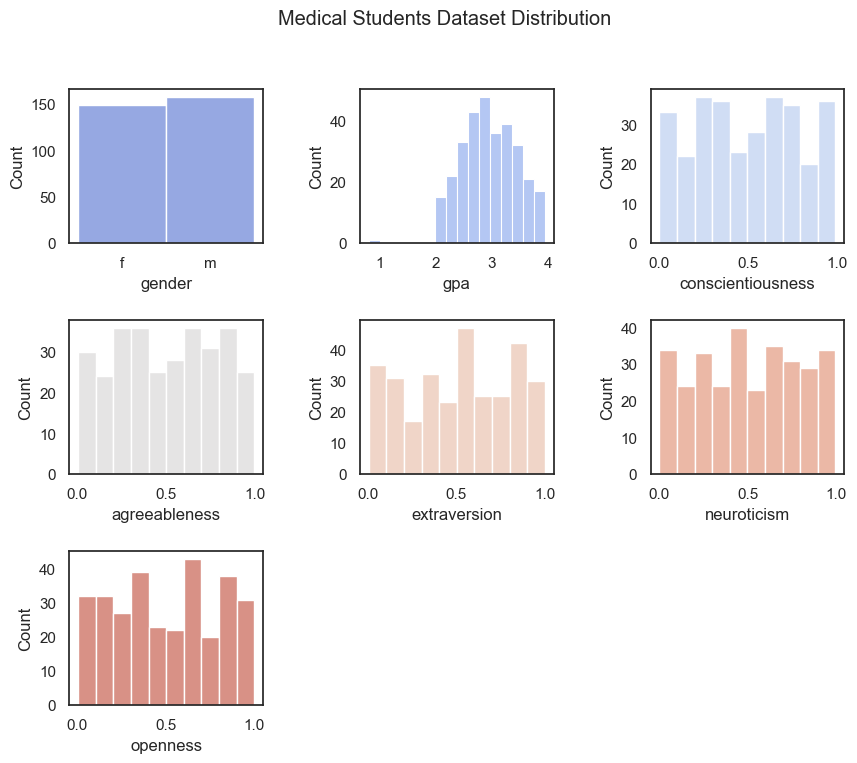

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Medical Students Dataset Distribution')

palette = ['#c1d2f1', '#dddcdc', '#ecc7b6', '#e5a089', '#cc6c5e']
posistion = [axes[0][2], axes[1][0], axes[1][1], axes[1][2], axes[2][0]]

# Gender distribution
sns.histplot(data=medical_df, x='gender', ax=axes[0][0], color='#738bd9')

# GPA distribution
sns.histplot(data=medical_df, x='gpa', ax=axes[0][1], color='#9bb5f0')

# Big Five personalities distribution
for personality, axes_pos, color_plt in zip(BIG_FIVE, posistion, palette):
    sns.histplot(data=medical_df, x=personality, ax=axes_pos, color=color_plt)

plt.show()

By examining a correlation matrix, we can pair column labels and observe their correlation coefficients. Looking at the correlations between `gpa`, there appears to be very weak correlations between any of the Big Five traits. 

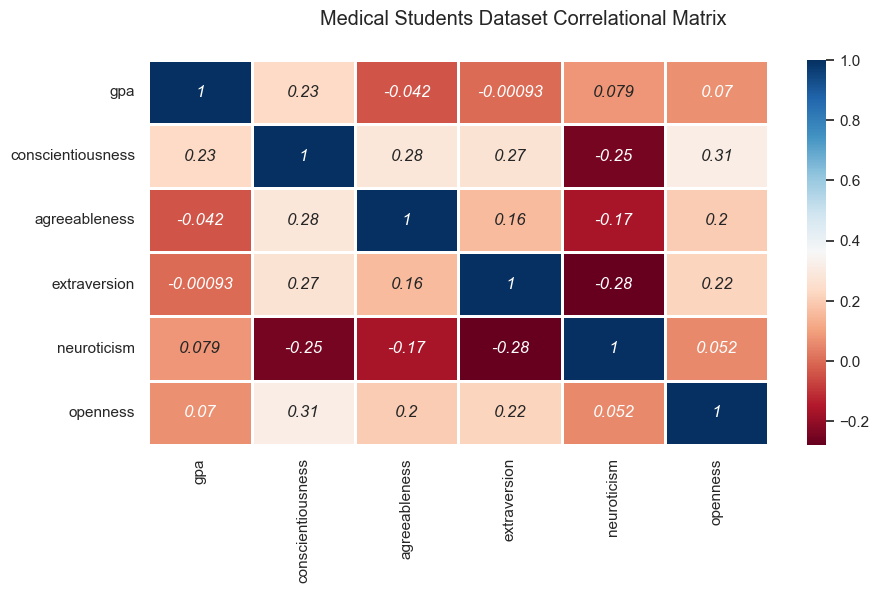

In [22]:
fig, axes = plt.subplots(figsize=(10, 5))
fig.suptitle('Medical Students Dataset Correlational Matrix')

# Compute correlational matrix for quantitative labels
medical_corr = medical_df[['gpa']+BIG_FIVE]

medical_corr = medical_corr.corr()

# Plot correlational matrix
sns.heatmap(medical_corr, cmap='RdBu', ax=axes, linewidths=1, annot=True, annot_kws={'fontstyle': 'italic'})

plt.show()

The respective correlation coefficients should reflect in the scatter plots against `gpa` below. The scatter plots does suggest a "zero" like relationship between `gpa` and each Big Five traits.

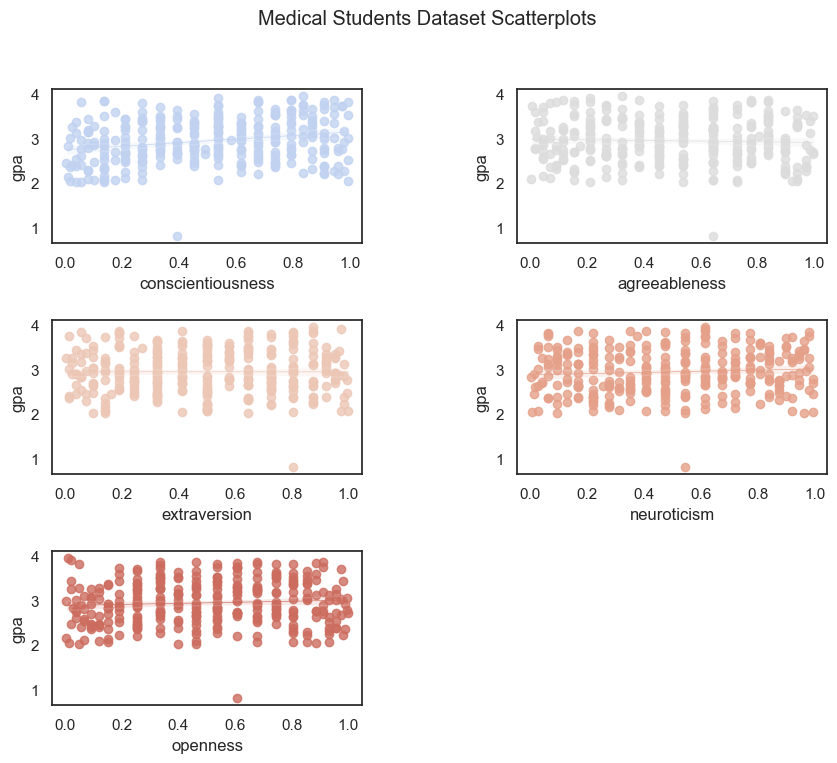

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
fig.delaxes(axes[2][1])
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Medical Students Dataset Scatterplots')

palette = ['#c1d2f1', '#dddcdc', '#ecc7b6', '#e5a089', '#cc6c5e']
posistion = [axes[0][0], axes[0][1], axes[1][0], axes[1][1], axes[2][0]]

# Big Five personalities scatterplots
for personality, axes_pos, color_plt in zip(BIG_FIVE, posistion, palette):
    sns.regplot(data=medical_df, y='gpa', x=personality, ax=axes_pos, color=color_plt)

plt.show()

Similiarly we could claim that there is no correlation from direct analysis, but let us check for confounding variables for each Big Five personality using single and multi-variable regression models. We will then compare their respective linear coefficients with the 10% Rule for Confounding.

| Single Correlations                 | Multi Correlations                                       |
| :---------------------------------- | --------------------------------------------------------:|
| `conscientiousness` vs. `gpa`       | (`conscientiousness` and `agreeableness`) vs. `gpa`      |
|                                     | (`conscientiousness` and `extraversion`) vs. `gpa`       |
|                                     | (`conscientiousness` and `neuroticism`) vs. `gpa`        |
|                                     | (`conscientiousness` and `openness`) vs. `gpa`           |
| `agreeableness` vs. `gpa`           | (`agreeableness` and `conscientiousness`) vs. `gpa`      |
|                                     | (`agreeableness` and `extraversion`) vs. `gpa`           |
|                                     | (`agreeableness` and `neuroticism`) vs. `gpa`            |
|                                     | (`agreeableness` and `openness`) vs. `gpa`               |
| `extraversion` vs. `gpa`            | (`extraversion` and `conscientiousness`) vs. `gpa`       |
|                                     | (`extraversion` and `agreeableness`) vs. `gpa`           |
|                                     | (`extraversion` and `nueroticism`) vs. `gpa`             |
|                                     | (`extraversion` and `openess`) vs. `gpa`                 |
| `neuroticism` vs. `gpa`             | (`neuroticism` and `conscientiousness`) vs. `gpa`        |
|                                     | (`neuroticism` and `agreeableness`) vs. `gpa`            |
|                                     | (`neuroticism` and `extraversion`) vs. `gpa`             |
|                                     | (`neuroticism` and `openness`) vs. `gpa`                 |
| `openness` vs. `gpa`                | (`openness` and `conscientiousness`) vs. `gpa`           |
|                                     | (`openness` and `agreeableness`) vs. `gpa`               |
|                                     | (`openness` and `extraversion`) vs. `gpa`                |
|                                     | (`openness` and `neuroticism`) vs. `gpa`                 |

In [24]:
# One-hot encode gender values: (m=1, f=0)
medical_df['gender'] = medical_df['gender'].replace(['m', 'f'], [1, 0])

In [25]:
# Convert data into arrays for easier use with sklearn
d_gpa = np.reshape(medical_df.gpa.values, [len(medical_df.gpa), 1])
d_conscientiousness = np.reshape(medical_df.conscientiousness.values, [len(medical_df.conscientiousness), 1])
d_agreeableness = np.reshape(medical_df.agreeableness.values, [len(medical_df.agreeableness), 1])
d_extraversion = np.reshape(medical_df.extraversion.values, [len(medical_df.extraversion), 1])
d_neuroticism = np.reshape(medical_df.neuroticism.values, [len(medical_df.neuroticism), 1])
d_openness = np.reshape(medical_df.openness.values, [len(medical_df.openness), 1])
d_gender = np.reshape(medical_df.gender.values, [len(medical_df.gender), 1])

In [26]:
# Create multi-correlation predictors (accounts for repeats)
variables = [d_conscientiousness, d_agreeableness, d_extraversion, d_neuroticism, d_openness, d_gender]
multi_variables = list(combinations(variables, 2))

Fitting a model with a single predictor should yield similar linear coefficients as the correlational coefficients in the heatmap. The model will be in this from, where `d2` is observed as `gpa` and  `d1` is observed as each Big Five personality. Our label of interest is `a1` which is the linear coefficient.

$$ d2 = a_0 + a_1 * d1 $$

In [27]:
# Single predictor
single_predictor = {feature: None for feature in BIG_FIVE+['gender']}

for variable, key in zip(variables, single_predictor.keys()):
    reg.fit(variable, d_gpa)
    single_predictor[key] = reg.coef_[0][0]
    
single_predictor

{'conscientiousness': 0.39900962063084655,
 'agreeableness': -0.0717575126295505,
 'extraversion': -0.0015867200352790679,
 'neuroticism': 0.1339382997679716,
 'openness': 0.11894343724124351,
 'gender': -0.09282219012828136}

Linear coefficients for multiple predictors. The model will be in this from, where `d5` is observed as `gpa` and `d3` and `d4` is observed as a Big Five personality pair. Our label of interest is `a4` and `a5` which is the linear coefficients.

$$ d5 = a_3 + a_4 * d3 + a_5 * d4 $$

Our goal is to check if $a_4$ is within a 10% error of $a_1$. If not, then the Big Five personality pair is confounded when correlating against `gpa`

In [28]:
# Mutltiple predictor
multi_predictor = {feature_pair: None for feature_pair in combinations(BIG_FIVE+['gender'], 2)}

for variable_pair, key in zip(multi_variables, multi_predictor.keys()):
    reg.fit(np.hstack(variable_pair), d_gpa)
    multi_predictor[key] = [reg.coef_[0][0], reg.coef_[0][1]]
    
multi_predictor

{('conscientiousness', 'agreeableness'): [0.45575674473476535,
  -0.2007700206018401],
 ('conscientiousness', 'extraversion'): [0.4302473582944228,
  -0.11683743088894072],
 ('conscientiousness', 'neuroticism'): [0.4612846571304354,
  0.2491577258896686],
 ('conscientiousness', 'openness'): [0.4010845591498397,
  -0.006630205801699185],
 ('conscientiousness', 'gender'): [0.40278254535335384, -0.09798058522742475],
 ('agreeableness', 'extraversion'): [-0.07338683106008946,
  0.010172399467775572],
 ('agreeableness', 'neuroticism'): [-0.05096243809008698, 0.12551300100283033],
 ('agreeableness', 'openness'): [-0.09936869338604754, 0.13870307886898464],
 ('agreeableness', 'gender'): [-0.0905875112805464, -0.09856904460527982],
 ('extraversion', 'neuroticism'): [0.038538308475109376, 0.14460463042541635],
 ('extraversion', 'openness'): [-0.029193628774654992, 0.12536282474946034],
 ('extraversion', 'gender'): [-0.002299423878514974, -0.09282805052385985],
 ('neuroticism', 'openness'): [0.1

We can prettify these numbers by categorizing them as a confounding variable or not using the 10% Rule for Confounding.

In [29]:
# Run 10% testing with expected coefficient from single variable prediction model
confounding_variables = {feature: [] for feature in BIG_FIVE+['gender']}

for feature in confounding_variables.keys():
    expected_coeff = single_predictor[feature]
    
    for feature_pair in multi_predictor.keys():
        if feature in feature_pair:
            coeff_index = feature_pair.index(feature)
            observed_coeff = multi_predictor[feature_pair]
            observed_coeff = observed_coeff[coeff_index]
            
            # Compute percentage difference, if >10% then it is a confounding variable
            difference = abs((expected_coeff - observed_coeff) / expected_coeff)
            confouding_variable = feature_pair[0 if coeff_index else 1]
            confounding_variables[feature] += [confouding_variable] if difference > 0.1 else []

In [30]:
for feature, confounding in confounding_variables.items():
    i = ', '.join(confounding) if confounding else 'none'
    print(f'{feature} confounds with: {i}')
    print('')

conscientiousness confounds with: agreeableness, neuroticism

agreeableness confounds with: conscientiousness, neuroticism, openness, gender

extraversion confounds with: conscientiousness, agreeableness, neuroticism, openness, gender

neuroticism confounds with: conscientiousness, gender

openness confounds with: conscientiousness, agreeableness

gender confounds with: neuroticism



We observe that the relationship betweeen `gpa` and each Big Five traits is confounded with multiple personalities. These results would imply that a correlational analysis of `gpa` and any Big Five personality would require us controlling for confounding personalities and `gender`.

In [31]:
y_gpa, x_feature = patsy.dmatrices(f'gpa ~ {independent_var}', data=medical_df)

# Fit ordinary least squares
results = sm.OLS(y_gpa, x_feature).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5.110
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           5.15e-05
Time:                        20:43:27   Log-Likelihood:                -202.00
No. Observations:                 307   AIC:                             418.0
Df Residuals:                     300   BIC:                             444.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7733      0.117     23.733      0.000       2.543       3.003
conscientiousness     0.5206      0.106      4.927      0.000       0.313       0.729
agreeableness        -0.1948      0.100     -1.941      0.053      -0.392       0.003
extraversion         -0.0590      0.102     -0.579      0.563      -0.260       0.141
neuroticism           0.1779      0.106      1.686      0.093      -0.030       0.386
openness             -0.0095      0.102     -0.093      0.926      -0.211       0.192
gender               -0.0861      0.057     -1.521      0.129      -0.198       0.025
==============================================================================
Omnibus:                        1.498   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.295
Skew:                          -0.153   Prob(JB):                        0.523
Kurtosis:                       3.087   Cond. No.                         9.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the yielded p-values, we can conclude that if the p-value for a feature is less than `ALPHA` or 0.05, then its correlation coefficient is statistically significant.

In [32]:
significant = []
for feature, pvalue in zip(BIG_FIVE+['gender'], results.pvalues[1:]):
    significant += [feature] if pvalue < ALPHA else []

significant

['conscientiousness']

Here we can conclude the `conscientiousness` personality has a coefficient of `0.5206`. Or in other words, strictly `conscientiousness` is moderately correlated to `gpa`.

## Part III: EDA of Engineering Graduates and Medical Students Dataset

We have two different datasets specifically for engineering and medical students. However, before we perform a side-by-side EDA of both datsets, we need to account for the different fields of study as well as their sample size difference. In this case, we will create a custom Big Five personality label for each observation.

Similar to a Myers–Briggs Type Indicator, we will create a label for an observation in both datasets like so,
1. High `conscientiousness` for `C` or low `conscientiousness` for `L`
2. High `agreeableness` for `A` or low `agreeableness` for `L`
3. High `extraversion` for `E` or low `extraversion` for `L`
4. High `neuroticism` for `N` or low `neuroticism` for `L`
5. High `openness` for `O` or low `openness` for `L`

Example, `CAELO` would mean a high `conscientiousness`, `agreeableness`, `extraversion`, and `openness` score, but a low `neuroticism` score

In [33]:
# Yield `personality label` whether they are simply high or low in each of the Big 5 Traits
def big5type(row):
    personality = ''
    
    personality += 'C' if row['conscientiousness'] >= 0.6 else 'L'
    personality += 'A' if row['agreeableness'] >= 0.6 else 'L'
    personality += 'E' if row['extraversion'] >= 0.6 else 'L'
    personality += 'N' if row['neuroticism'] >= 0.6 else 'L'
    personality += 'O' if row['openness'] >= 0.6 else 'L'
    
    return personality

In [34]:
# Create a Big Five personality label for all engineering observations
engineering_df['label'] = engineering_df.apply(big5type, axis=1)

engineering_df.head()

,gender,gpa,conscientiousness,agreeableness,extraversion,neuroticism,openness,label
0,0,2.9528,0.423115,0.572048,0.912608,0.622248,0.637759,LLENO
1,1,2.6000,0.877085,0.416111,0.912608,0.745163,0.401935,CLENL
2,1,2.4776,0.676451,0.322382,0.957638,0.455971,0.365911,CLELL
3,1,3.2160,0.306371,0.486991,0.606071,0.667445,0.719646,LLENO
4,0,2.5720,0.088893,0.154436,0.125584,0.591561,0.599900,LLLLL


In [36]:
# Create a Big Five personality label for all medical observations
medical_df['label'] = medical_df.apply(big5type, axis=1)
medical_df.head()

,gender,gpa,conscientiousness,agreeableness,extraversion,neuroticism,openness,label
0,0,3.84,0.136808,0.153094,0.806189,0.980456,0.887622,LLENO
1,0,2.90,0.452769,0.838762,0.035831,0.543974,0.057003,LALLL
2,0,2.57,0.537459,0.452769,0.726384,0.472313,0.677524,LLELO
3,0,2.58,0.333876,0.043974,0.324104,0.350163,0.068404,LLLLL
4,0,3.65,0.793160,0.941368,0.324104,0.543974,0.744300,CALLO


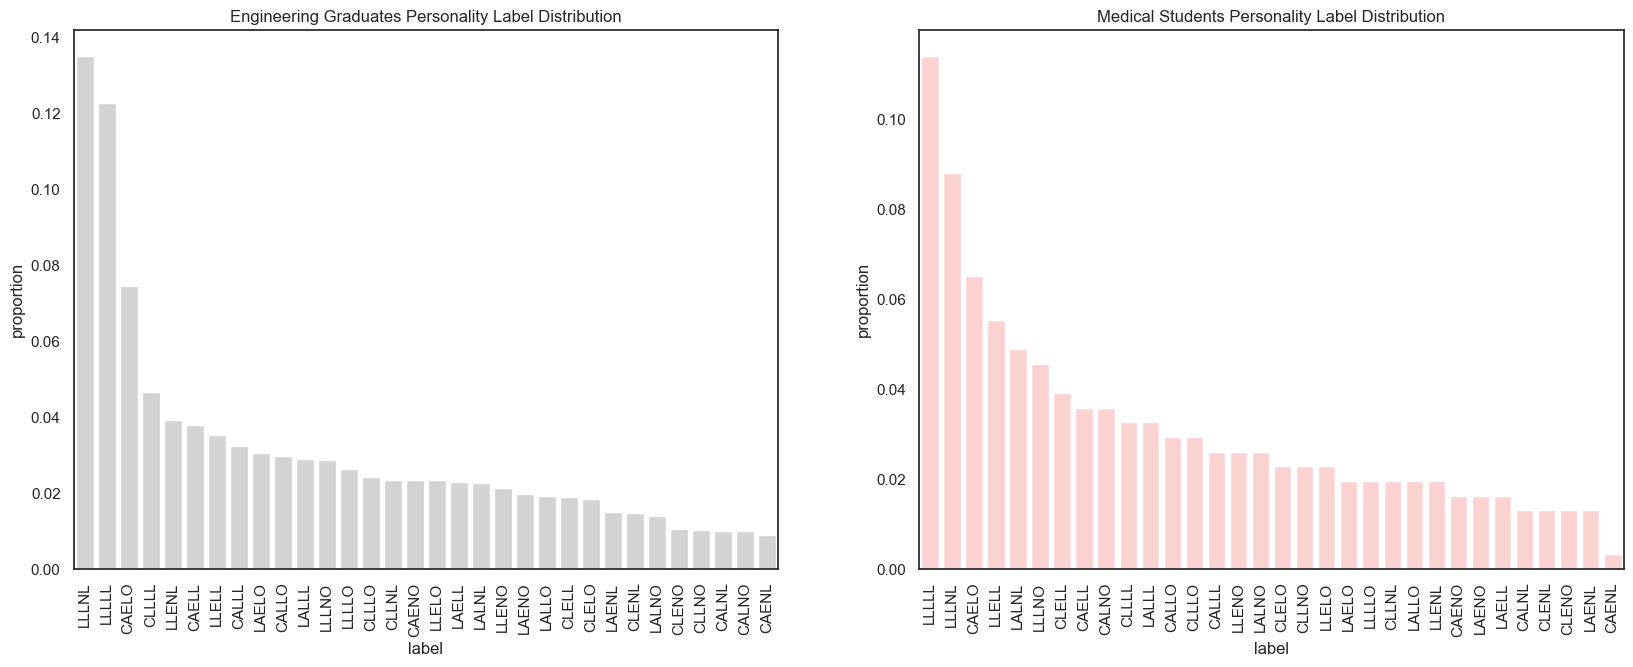

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Engineering personality label count distribution
engineering_label_count = engineering_df['label'].value_counts(normalize=True)
plt1 = sns.barplot(x=engineering_label_count.index, y=engineering_label_count, ax=axes[0], color='#D3D3D3')
plt1.set(title='Engineering Graduates Personality Label Distribution', xlabel='label', ylabel='proportion')
plt1.tick_params(axis='x', rotation=90)

# Medical personality label count distribution
medical_label_count = medical_df['label'].value_counts(normalize=True)
plt2 = sns.barplot(x=medical_label_count.index, y=medical_label_count, ax=axes[1], color='#FFCCCB')
plt2.set(title='Medical Students Personality Label Distribution',  xlabel='label', ylabel='proportion')
plt2.tick_params(axis='x', rotation=90)

plt.show()

Display all possible and unique Big Five personality `labels`

In [38]:
BIG_FIVE_LABELS = medical_df['label'].unique()

BIG_FIVE_LABELS

array(['LLENO', 'LALLL', 'LLELO', 'LLLLL', 'CALLO', 'LLLNO', 'CAENO',
       'CLELO', 'CALNO', 'CAELO', 'LLENL', 'CLLNO', 'LALNL', 'LALNO',
       'LLLNL', 'LAELO', 'LLELL', 'CLLLL', 'CALLL', 'LALLO', 'CALNL',
       'CAELL', 'CLLLO', 'CLLNL', 'CLELL', 'LLLLO', 'LAENO', 'CLENL',
       'LAELL', 'CAENL', 'CLENO', 'LAENL'], dtype=object)

For each dataset, we can individually look for specific personality labels that may have a greater correlation with `gpa`. Starting with the engineering graduates dataset, we observe that `CALLO` has the highest correlation of `0.0922`.

In other words, within the engineering dataset population, a high `conscientiousness`, `agreeableness`, and `openness` score but a low `extraversion` and `neuroticism` is the most optimal personality label to correlate or predict `gpa` performance.

In [39]:
y_gpa, x_label = patsy.dmatrices('gpa ~ label', data=engineering_df)
mod_label = sm.OLS(y_gpa, x_label)

# Fit ordinary least squares
results = mod_label.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.813
Date:                Thu, 23 Mar 2023   Prob (F-statistic):            0.00392
Time:                        20:43:28   Log-Likelihood:                -854.86
No. Observations:                2998   AIC:                             1774.
Df Residuals:                    2966   BIC:                             1966.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.8731      0.030     94.814      0.000       2.814       2.933
label[T.CAELO]     0.0232      0.037      0.623      0.533      -0.050       0.096
label[T.CAENL]    -0.1141      0.069     -1.647      0.100      -0.250       0.022
label[T.CAENO]    -0.0718      0.049     -1.461      0.144      -0.168       0.025
label[T.CALLL]     0.0458      0.045      1.025      0.306      -0.042       0.133
label[T.CALLO]     0.0922      0.046      2.015      0.044       0.002       0.182
label[T.CALNL]     0.0686      0.066      1.033      0.302      -0.062       0.199
label[T.CALNO]    -0.0539      0.066     -0.812      0.417      -0.184       0.076
label[T.CLELL]    -0.0474      0.052     -0.904      0.366      -0.150       0.055
label[T.CLELO]    -0.0493      0.053     -0.927      0.354      -0.153       0.055
label[T.CLENL]    -0.0393      0.057     -0.684      0.494      -0.152       0.073
label[T.CLENO]    -0.0664      0.065     -1.026      0.305      -0.193       0.061
label[T.CLLLL]     0.0208      0.041      0.508      0.611      -0.059       0.101
label[T.CLLLO]    -0.0117      0.048     -0.241      0.810      -0.107       0.083
label[T.CLLNL]     0.0254      0.049      0.518      0.605      -0.071       0.122
label[T.CLLNO]     0.0081      0.066      0.124      0.901      -0.120       0.137
label[T.LAELL]     0.0245      0.049      0.496      0.620      -0.072       0.121
label[T.LAELO]    -0.0040      0.045     -0.089      0.929      -0.093       0.085
label[T.LAENL]    -0.0102      0.057     -0.179      0.858      -0.122       0.101
label[T.LAENO]    -0.1117      0.052     -2.152      0.031      -0.213      -0.010
label[T.LALLL]     0.0135      0.046      0.293      0.770      -0.077       0.104
label[T.LALLO]     0.0464      0.052      0.890      0.374      -0.056       0.149
label[T.LALNL]     0.0572      0.050      1.154      0.249      -0.040       0.154
label[T.LALNO]    -0.0921      0.058     -1.576      0.115      -0.207       0.022
label[T.LLELL]    -0.0432      0.044     -0.990      0.322      -0.129       0.042
label[T.LLELO]     0.0355      0.049      0.722      0.470      -0.061       0.132
label[T.LLENL]    -0.0882      0.042     -2.077      0.038      -0.172      -0.005
label[T.LLENO]    -0.0246      0.051     -0.486      0.627      -0.124       0.075
label[T.LLLLL]    -0.0121      0.035     -0.349      0.727      -0.080       0.056
label[T.LLLLO]    -0.0210      0.047     -0.444      0.657      -0.114       0.072
label[T.LLLNL]    -0.0460      0.034     -1.340      0.180      -0.113       0.021
label[T.LLLNO]    -0.0281      0.046     -0.609      0.542      -0.119       0.062
==============================================================================
Omnibus:                     1052.376   Durbin-Watson:                   1.974
Prob(Omnibus):      

Likewise with the medical students dataset, we see that `CLENL` has the highest correlation of `0.4118`.

In other words, within the medical students dataset population, a high `conscientiousness`, `extraversion`, and `neuroticism` score but a low `agreeableness` and `openness` is the most optimal personality label to correlate or predict `gpa` performance.

In [40]:
y_gpa, x_label = patsy.dmatrices('gpa ~ label', data=medical_df)
mod_label = sm.OLS(y_gpa, x_label)

# Fit ordinary least squares
results = mod_label.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.253
Date:                Thu, 23 Mar 2023   Prob (F-statistic):              0.175
Time:                        20:43:28   Log-Likelihood:                -196.66
No. Observations:                 307   AIC:                             457.3
Df Residuals:                     275   BIC:                             576.6
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.0582      0.146     20.907      0.000       2.770       3.346
label[T.CAELO]    -0.2302      0.182     -1.264      0.207      -0.589       0.128
label[T.CAENL]    -0.0382      0.507     -0.075      0.940      -1.036       0.959
label[T.CAENO]    -0.1482      0.262     -0.566      0.572      -0.663       0.367
label[T.CALLL]    -0.1044      0.225     -0.463      0.644      -0.548       0.339
label[T.CALLO]     0.1452      0.218      0.666      0.506      -0.284       0.574
label[T.CALNL]    -0.0632      0.283     -0.223      0.824      -0.621       0.494
label[T.CALNO]     0.1036      0.207      0.501      0.617      -0.304       0.511
label[T.CLELL]    -0.0990      0.203     -0.489      0.625      -0.498       0.300
label[T.CLELO]    -0.0325      0.235     -0.138      0.890      -0.494       0.429
label[T.CLENL]     0.4118      0.283      1.454      0.147      -0.146       0.969
label[T.CLENO]     0.2593      0.283      0.915      0.361      -0.298       0.817
label[T.CLLLL]    -0.0492      0.212     -0.232      0.817      -0.466       0.368
label[T.CLLLO]     0.0263      0.218      0.120      0.904      -0.403       0.456
label[T.CLLNL]     0.1835      0.246      0.745      0.457      -0.301       0.668
label[T.CLLNO]     0.0190      0.235      0.081      0.936      -0.443       0.481
label[T.LAELL]    -0.3782      0.262     -1.445      0.150      -0.893       0.137
label[T.LAELO]    -0.7348      0.246     -2.985      0.003      -1.220      -0.250
label[T.LAENL]    -0.1357      0.283     -0.479      0.632      -0.693       0.422
label[T.LAENO]     0.1098      0.262      0.420      0.675      -0.405       0.625
label[T.LALLL]    -0.3192      0.212     -1.506      0.133      -0.736       0.098
label[T.LALLO]    -0.2098      0.246     -0.852      0.395      -0.695       0.275
label[T.LALNL]    -0.1355      0.193     -0.704      0.482      -0.515       0.244
label[T.LALNO]    -0.0632      0.225     -0.280      0.779      -0.507       0.381
label[T.LLELL]    -0.0894      0.188     -0.476      0.634      -0.459       0.280
label[T.LLELO]    -0.1796      0.235     -0.766      0.444      -0.641       0.282
label[T.LLENL]    -0.2132      0.246     -0.866      0.387      -0.698       0.272
label[T.LLENO]     0.1131      0.225      0.502      0.616      -0.331       0.557
label[T.LLLLL]    -0.2562      0.168     -1.528      0.128      -0.586       0.074
label[T.LLLLO]     0.0668      0.246      0.271      0.786      -0.418       0.552
label[T.LLLNL]    -0.1723      0.174     -0.993      0.322      -0.514       0.169
label[T.LLLNO]    -0.1860      0.195     -0.952      0.342      -0.571       0.199
==============================================================================
Omnibus:                        3.923   Durbin-Watson:                   2.017
Prob(Omnibus):      

For each observation, we can visualize the expected `gpa` for each personality labels as well as their max, min, and median `gpa`. For the engineering graduate plot, the `CALLO` label has the highest average `gpa`. For the medical students plot, the `CLENL` label has the highest average `gpa`. In other words, in the larger population, individuals with a `CALLO` and `CLENL` personality label may necessarily academically perform better than any other individual.

In [41]:
# Generate data of average, median, max, min for each label given a dataframe
def generate_label_data(df):
    global BIG_FIVE_LABELS
    
    label_data = {'label': BIG_FIVE_LABELS, 'avg': [], 'median': [], 'max': [], 'min': []}
    
    for label in BIG_FIVE_LABELS:
        label = df['label'] == label
        gpa_data = df[label]['gpa']
        
        label_data['avg'].append(gpa_data.mean())
        label_data['median'].append(gpa_data.median())
        label_data['max'].append(gpa_data.max())
        label_data['min'].append(gpa_data.min())
    
    return pd.DataFrame.from_dict(label_data)

engineering_label_data = generate_label_data(engineering_df).set_index('label')
medical_label_data = generate_label_data(medical_df).set_index('label')

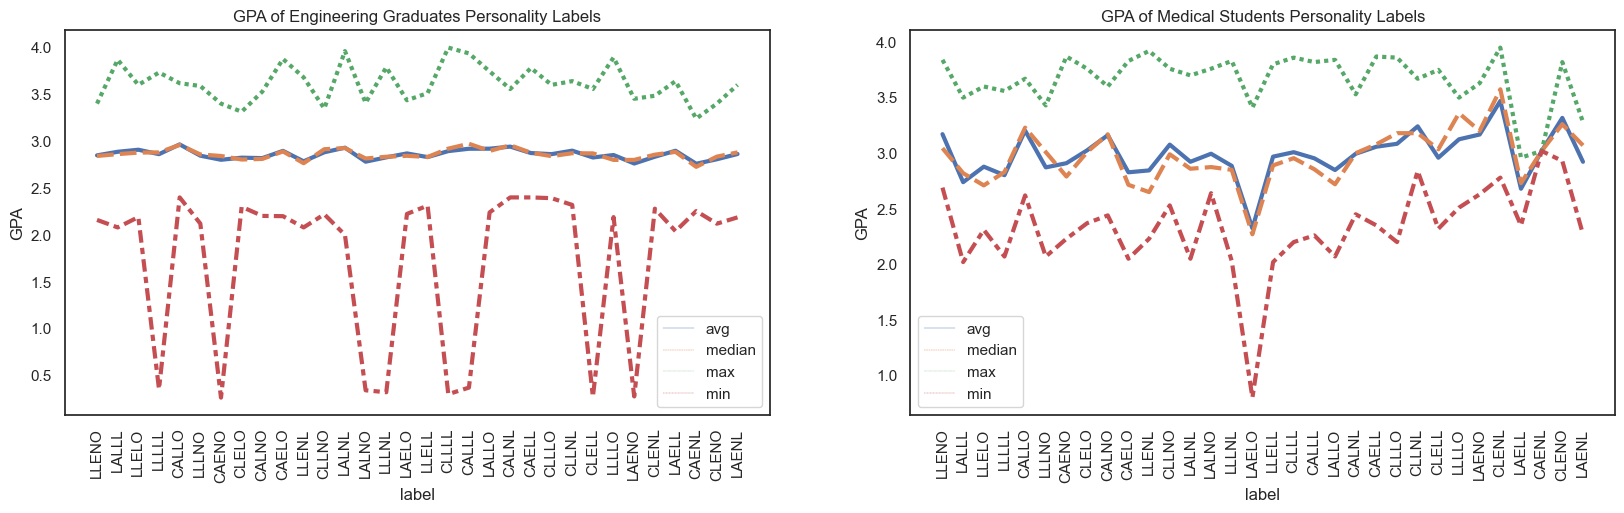

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.subplots_adjust(wspace=0.2)

# Engineering_label_data
plt1 = sns.lineplot(data=engineering_label_data, ax=axes[0], linewidth=3)
plt1.set(title='GPA of Engineering Graduates Personality Labels', xlabel='label', ylabel='GPA')
plt1.tick_params(axis='x', rotation=90)

# Medical_label_data
plt2 = sns.lineplot(data=medical_label_data, ax=axes[1], linewidth=3)
plt2.set(title='GPA of Medical Students Personality Labels', xlabel='label', ylabel='GPA')
plt2.tick_params(axis='x', rotation=90)

plt.show()

Closely observe the average `gpa` for each personality labels within the engineering and medical datasets below. From the plot, we expect that medical students may outperform engineering graduates, yet this could be explained by a smaller sample size resulting more variation as shown. A large sample size, like the engineering dataset, yields a stable plot. However, to account for the sample size difference, we are observing the average `gpa`, conditionally concluding that the field of study could be a factor when anlyzing if there are correlations between Big Five traits and academic performance.

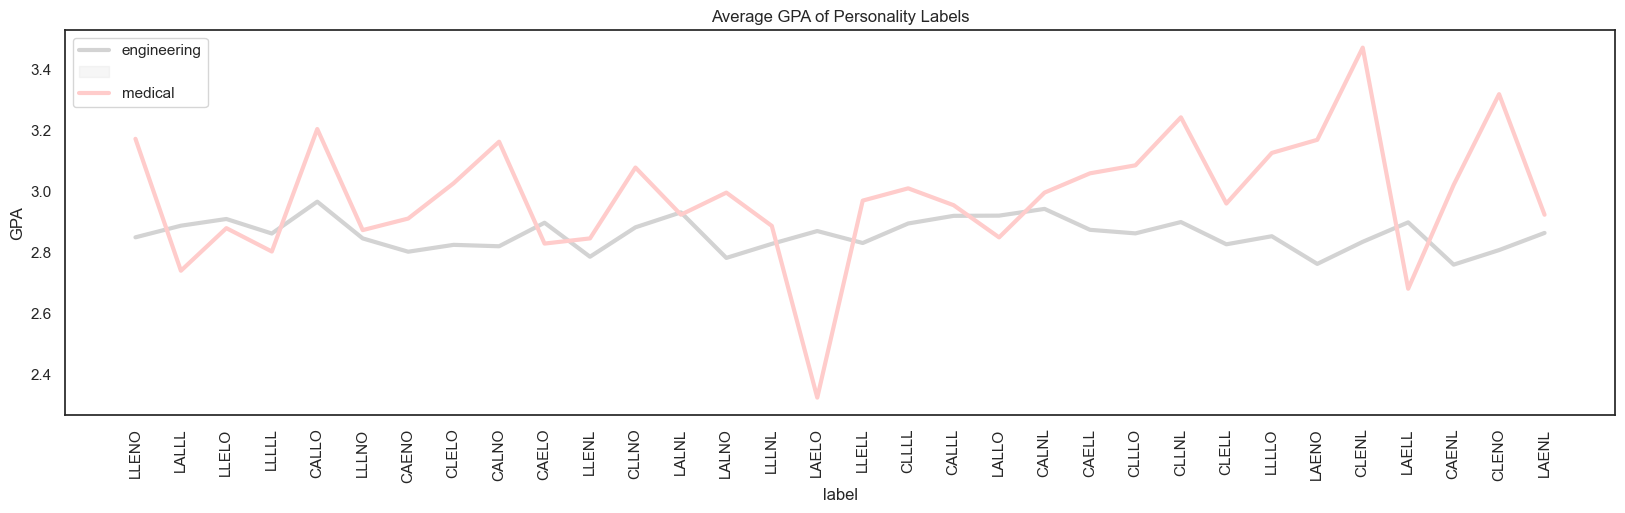

In [45]:
fig, axes = plt.subplots(figsize=(20, 5))

# Plot average GPA for personality labels from both datasets
plt1 = sns.lineplot(x=engineering_label_data.index, y='avg', data=engineering_label_data, ax=axes, linewidth=3, color='#D3D3D3')
plt2 = sns.lineplot(x=medical_label_data.index, y='avg', data=medical_label_data, ax=axes, linewidth=3, color='#FFCCCB')

plt1.set(title='Average GPA of Personality Labels', xlabel='label', ylabel='GPA')
plt1.tick_params(axis='x', rotation=90)
axes.legend(['engineering', '', 'medical'])

plt.show()